In [1]:
# pip install geopy
# pip install osmnx
# pip install osmium
# pip install neo4j

#### Importation des bibliothèques nécessaires

In [1]:
import osmnx as ox
import numpy as np
from geopy.distance import great_circle
import osmium
import json
import folium
from folium.features import Marker, CircleMarker
from geopy.distance import great_circle

### Charger le graphe à partir du fichier OSM

In [2]:
fichier_osm = 'Fes.osm'
graph = ox.graph_from_xml(fichier_osm)

#### Tracez le graphe projeté

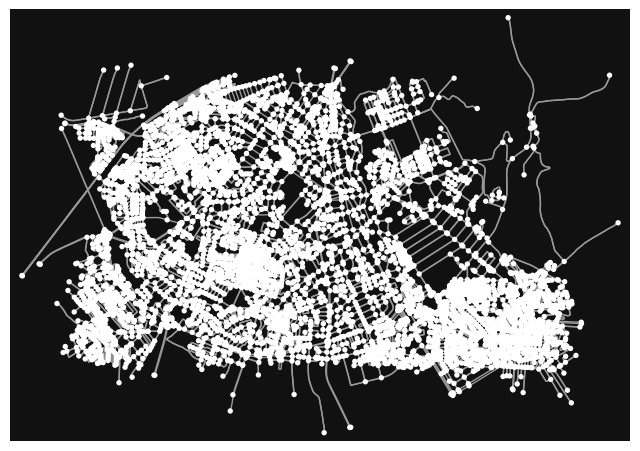

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [3]:
ox.plot_graph(ox.project_graph(graph))

In [4]:
len(graph.nodes())
graph.nodes[6925700301]

{'y': 34.0351607, 'x': -4.9802339}

Nous avons créé un dictionnaire appelé dicDesNodes qui contient les nœuds de notre graphe en tant que clés et une liste de leurs successeurs en tant que valeurs

In [5]:
dicDesNodes={}
for i in graph.nodes:
    successors = list(graph.successors(i))
    dicDesNodes[i]=successors
dicDesNodes

{6819872768: [3971686377, 257583286, 257582166],
 1584652349: [5742313989, 1584652362],
 5743935549: [2700372450, 2700372428],
 1584652351: [1587229307, 5742314013],
 1588101188: [5742279911, 1584708271],
 5743935562: [4760768540, 5196063258],
 3971695401: [260148903],
 257523803: [260263951, 6799312994, 6805469425],
 5743935588: [11036999197, 11036999201],
 5743935589: [5743935588, 9708889791],
 257523827: [1589342251],
 5143916592: [5751612028, 1588354443, 5143916591],
 5143916593: [5614798736, 1588354423, 1588354429],
 6801948814: [6801978135, 260262503, 6801948825],
 864912407: [864912332, 864885907, 6801817430],
 6801948825: [260262503, 6801948814, 6801948833],
 5204639899: [289675656, 262667680, 5204648622],
 6801948833: [260262492, 6800043504, 6801948825],
 5143916604: [4836132439, 5143916605, 5143916602],
 5143916605: [5143918141, 5143916607, 5143916604],
 1585578169: [1585578171, 1587262615, 1586341360],
 1585578171: [1587262636, 1585578169, 1586341362],
 1585578173: [15863413

Nous avons créé un dictionnaire appelé distAvecDistance qui contient les distances entre les nœuds de notre graphe. Chaque distance est représentée sous forme de paires (ID du nœud, distance) pour chaque nœud.

In [6]:
distAvecDistance={}
for i in dicDesNodes.keys():
    coordsStart = (graph.nodes[i]['y'], graph.nodes[i]['x'])
    l=[]
    for j in dicDesNodes[i]:
        coordsEnd = (graph.nodes[j]['y'], graph.nodes[j]['x'])
        distanceMeters = great_circle(coordsStart, coordsEnd).meters
        l.append([j,round(distanceMeters, 2)])
    distAvecDistance[i]=l
    
distAvecDistance

{6819872768: [[3971686377, 76.03], [257583286, 40.93], [257582166, 107.04]],
 1584652349: [[5742313989, 12.66], [1584652362, 22.51]],
 5743935549: [[2700372450, 3.09], [2700372428, 55.77]],
 1584652351: [[1587229307, 49.35], [5742314013, 13.56]],
 1588101188: [[5742279911, 39.71], [1584708271, 72.53]],
 5743935562: [[4760768540, 46.77], [5196063258, 36.97]],
 3971695401: [[260148903, 18.75]],
 257523803: [[260263951, 243.39], [6799312994, 233.67], [6805469425, 667.2]],
 5743935588: [[11036999197, 14.86], [11036999201, 21.99]],
 5743935589: [[5743935588, 42.17], [9708889791, 11.62]],
 257523827: [[1589342251, 1283.01]],
 5143916592: [[5751612028, 26.3], [1588354443, 16.21], [5143916591, 43.78]],
 5143916593: [[5614798736, 27.89], [1588354423, 15.49], [1588354429, 29.7]],
 6801948814: [[6801978135, 71.03], [260262503, 168.96], [6801948825, 166.92]],
 864912407: [[864912332, 25.24], [864885907, 22.54], [6801817430, 23.27]],
 6801948825: [[260262503, 180.42], [6801948814, 166.92], [6801948

On lit le fichier JSON 'fezHotels.json' qui contient les hôtels de Fès.

In [7]:
with open('fezHotels.json', 'r') as file:
    dataHotels = json.load(file)
for tmp in dataHotels:
   print(tmp)

{'placeUrl': 'https://www.google.com/maps/place/105+Kasbah+de+Boujloud+Fes+Morocco./data=!4m8!3m7!1s0xd9ff4af0e63db69:0x77a7261981b9e119!5m2!4m1!1i2!8m2!3d34.0616658!4d-4.9838877', 'title': '105 Kasbah de Boujloud Fes Morocco.', 'rating': '5,0', 'reviewCount': 1, 'category': '', 'attributes': '', 'address': '105 Kasbah de, Boujloud، Fès 30000, Maroc', 'plusCode': '3268+MC Fès, Maroc', 'website': '', 'phoneNumber': '+212 661-353886', 'currentStatus': '', 'imgUrl': 'https://lh5.googleusercontent.com/p/AF1QipOvKi_QMEFyhFQsG2Ix1iuQW7NWbhmvXhfXNqX2=w408-h408-k-no', 'isClaimed': True, 'latitude': 34.061687500000005, 'longitude': -4.98393750000001, 'query': 'https://www.google.com/maps/search/hotel/@33.998354,-5.0778387,6929m/data=!3m1!1e3', 'timestamp': '2022-03-12T15:18:20.771Z'}
{'placeUrl': 'https://www.google.com/maps/place/Across+H%C3%B4tels+%26+Spa/data=!4m8!3m7!1s0xd9f8b48058c0573:0x266806ec18a2e003!5m2!4m1!1i2!8m2!3d34.0412517!4d-4.9968186', 'title': 'Across Hôtels & Spa', 'rating': 

on cherche sur le nœud le plus proche pour chaque hôtel en utilisant la fonction trouverNoeudPlusProche. Ensuite, il construit une liste IdHotels contenant les informations pertinentes pour chaque hôtel, y compris son ID, sa position, son titre, son adresse, son code postal, son numéro de téléphone et son URL d'image.

In [8]:
def trouverNoeudPlusProche(position, graph):
    plus_proche_noeud = None
    plus_petite_distance = float('inf')
    node_id=None
    l=[]
    for node in graph:
        node_id=node
        lon,lat= graph.nodes[node]['y'],graph.nodes[node]['x']
        distance = great_circle(position, (lon, lat)).meters
        l.append([node_id,distance])
        
    d=min(l, key=lambda x: x[1])
    return d[0]

IdHotels=[]
for tmp in dataHotels:
   p=(tmp['latitude'],tmp['longitude'])
   noeudPlusProche= trouverNoeudPlusProche(p, graph)
   node=graph.nodes[noeudPlusProche]
   pos=(node['y'],node['x']) 
   IdHotels.append({'id':noeudPlusProche,'pos':pos,'title':tmp['title'],'rating':tmp['rating'], 'address':tmp['address'],'plusCode':tmp['plusCode'],'phoneNumber':tmp['phoneNumber'],'imgUrl':tmp['imgUrl']})
IdHotels

[{'id': 257523827,
  'pos': (34.0532827, -4.9723629),
  'title': '105 Kasbah de Boujloud Fes Morocco.',
  'rating': '5,0',
  'address': '105 Kasbah de, Boujloud، Fès 30000, Maroc',
  'plusCode': '3268+MC Fès, Maroc',
  'phoneNumber': '+212 661-353886',
  'imgUrl': 'https://lh5.googleusercontent.com/p/AF1QipOvKi_QMEFyhFQsG2Ix1iuQW7NWbhmvXhfXNqX2=w408-h408-k-no'},
 {'id': 3189100648,
  'pos': (34.0411502, -4.9966288),
  'title': 'Across Hôtels & Spa',
  'rating': '4,0',
  'address': '76 Boulevard Chefchaouni, Fès 30000, Maroc',
  'plusCode': '22R3+G7 Fès, Maroc',
  'phoneNumber': '+212 5359-40606',
  'imgUrl': 'https://lh6.googleusercontent.com/proxy/nU2zcvm_XsGZXdRgzemHtmqimgtBCZR2PXAGD59zChdXf337ruYDRH-sKqEkvgmcghopqISTYIW6sRjDlIXt5xr9jE2Y0UPrdgJvEQgtc_h0n2P0IIBc2dUhmtHYN9Z1odrku7AAbW_NZBFXFq2u1XUbbvvUFQ=w408-h270-k-no'},
 {'id': 257523827,
  'pos': (34.0532827, -4.9723629),
  'title': 'Algilà Fès Riad Medina Charme Hotel',
  'rating': '4,6',
  'address': '17, Akibat Sbaa, Fès, Maroc',

on crée une carte Folium centrée sur les coordonnées (34.0305657,-4.9969476) avec un zoom de niveau 13. Ensuite, il itère à travers chaque hôtel dans la liste IdHotels, et pour chaque hôtel, il crée un marqueur avec un popup contenant des informations telles que le nom, l'adresse, le numéro de téléphone et une image. Enfin, il ajoute chaque marqueur à la carte.

In [33]:
map = folium.Map(location=(34.0305657,-4.9969476),zoom_start=13)
for tmp in IdHotels:
   textHtml="""
         <div style="width:250px; padding-bottom:10px;">
           <b><span style="color:red;">le nom : </span>"""+tmp['title']+"""</b><br>
           <b><span style="color:red;">L'adresse :</span> """+tmp['address']+"""</b><br>
           <b><span style="color:red;">le numéro de téléphone :</span> """+tmp['phoneNumber']+"""</b><br>
           <b><span style="color:red;">Évaluation :</span> """+tmp['rating']+"""</b><br><br>
           <img src='"""+tmp['imgUrl']+"""' style="width:200px;display: block;margin: 0 auto;">
          </div>"""
   folium.Marker(location=tmp['pos'],popup=folium.Popup(textHtml)).add_to(map)
map

<h2 style="color:blue;">Insertion des données dans une base de données Neo4j</h2>

In [34]:
from neo4j import GraphDatabase

#### initialisation de la connexion à la base de données Neo4j

In [35]:
uri = "neo4j://localhost:7687"
username = "neo4j"
password = "bdsas1234"
driver = GraphDatabase.driver(uri, auth=(username, password))
session= driver.session()

In [36]:
session.run("MATCH (n) DETACH DELETE n")

Création d'une fonction pour insérer un nouveau nœud dans notre base de données Neo4j, en spécifiant son ID ainsi que ses coordonnées (latitude et longitude).

In [37]:
def insertNode(tx, id, lat, lon):
    tx.run("CREATE (h:Node {id: $id, lat: $lat, lon: $lon})", id=id, lat=lat, lon=lon)

Création d'une fonction pour insérer un nouvel hôtel dans notre base de données Neo4j, avec des attributs tels que l'ID, les coordonnées géographiques, le nom, l'adresse, etc.

In [40]:
def insertHotel(tx,id,lat,lon,name,rat,address,plusCode,phoneNumber,imgUrl,etat):
    tx.run("CREATE (h:Node {id:$id,lat: $lat, lon: $lon,name:$name,rating:$rat,address:$address,plusCode:$plusCode,phoneNumber:$phoneNumber,imgUrl:$imgUrl,etat:$etat})",id=id,lat=lat, lon=lon,name=name,rat=rat,address=address,plusCode=plusCode,phoneNumber=phoneNumber,imgUrl=imgUrl,etat=etat)

Nous avons inséré les nœuds dans notre base de données Neo4j en utilisant la fonction 'insertNode' que nous avions définie précédemment.

In [41]:
for node in dicDesNodes:
    session.execute_write(insertNode,node,graph.nodes[node]['y'], graph.nodes[node]['x'])

In [42]:
session.run("MATCH (n) WHERE n.etat = $etat DETACH DELETE n",etat="hotel")

Nous avons inséré les hotels dans notre base de données Neo4j en utilisant la fonction 'insertHotels' que nous avions définie précédemment.

In [43]:
for tmp in IdHotels:
    # print(tmp['id'],tmp['pos'][0],tmp['pos'][1],tmp['title'], tmp['address'],tmp['plusCode'],tmp['phoneNumber'],tmp['imgUrl'],)
    session.execute_write(insertHotel,tmp['id'],tmp['pos'][0],tmp['pos'][1],tmp['title'],tmp['rating'],tmp['address'],tmp['plusCode'],tmp['phoneNumber'],tmp['imgUrl'],"hotel")

In [51]:
resultats = session.run("MATCH (n:Node) RETURN n")
for record in resultats:
        print(record,'\n')

La fonction createDistanceRelationship permet de créer une relation de distance entre deux nœuds dans notre base de données Neo4j.

In [44]:
def createDistanceRelationship(tx, id1, id2, distance):
    tx.run("MATCH (n1:Node {id: $id1}), (n2:Node {id:$id2}) "
           "CREATE (n1)-[:CONNECTED_TO {distance: $distance}]->(n2)",
           id1=id1, id2=id2, distance=distance)

Nous avons créé les relations de distance entre différents nœuds de notre graphe en utilisant la fonction "createDistanceRelationship" que nous avions définie précédemment.

In [45]:
for node in distAvecDistance:
    for suc in distAvecDistance[node]:
        session.execute_write(createDistanceRelationship, id1=node, id2=suc[0],distance=suc[1])

In [52]:
resultats = session.run("""
    MATCH (n1:Node)-[r:CONNECTED_TO]->(n2:Node)
    RETURN n1.id AS id1, n2.id AS id2, r.distance AS distance
""")
for record in resultats:
    print(f"{record['id1']} => {record['id2']} :=  {record['distance']}")

In [47]:
resultats = session.run("""
    MATCH (n1:Node)-[r:CONNECTED_TO]->(n2:Node)
    RETURN n1.id AS id1, n2.id AS id2, r.distance AS distance
""")
nombreRelations=0
for record in resultats:
    nombreRelations += 1
    
print(nombreRelations)

17667
